# 1. Install the Quandl library and register for a Quandl account as described in the Exercise.

In [92]:
# Importing libaries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings

plt.style.use('fivethirtyeight') # styling option


In [93]:
# Defining a path
path = r"C:\Users\andyc\Job Salary Analysis"

# 2. Find a data set to work and import it into your Jupyter notebook.

The Zillow Real Estate Data feed offers key market information on home values, rentals, sales, and inventories for over 78,200 regions in the U.S. It is updated weekly on Sundays by 1 PM UTC. Zillow, a top real estate platform, helps consumers with data and connects them to local professionals. The data includes 56 indicators across three main categories: home values, rentals, and sales and inventories.

LINK TO DATASET: https://data.nasdaq.com/databases/ZILLOW

In [97]:
# Import the zillow insights dataset from quandl
zillow = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'ZILLOW-DATA.csv'), index_col = False)

In [98]:
# Checking the first 5 rows of the zillow dataframe
zillow.head()

,indicator_id,region_id,date,value
0,ZSFH,99999,2024-07-31,486230.166077
1,ZSFH,99999,2024-06-30,485893.210056
2,ZSFH,99999,2024-05-31,484599.091201
3,ZSFH,99999,2024-04-30,481777.608669
4,ZSFH,99999,2024-03-31,480423.651093


In [99]:
# Checking for value counts
zillow['region_id'].value_counts(dropna=False)

region_id
99963    343
99965    343
99960    343
99962    343
99961    343
99964    343
9999     342
99995    325
99968    325
99972    314
99971    307
99997    295
99967    235
99974    235
99979    235
99998    235
99980    235
99999    235
99983    235
99992    235
99982    235
99990    234
99984    233
99985    233
99993    233
99994    233
99973    233
99989    232
99996    232
99987    231
99975    230
99978    216
99976    213
99991    213
99977    210
99986    190
9998     181
99988    158
99970    122
99959     92
Name: count, dtype: int64

In [100]:
# Checking the nubmer of rows and columns
zillow.shape

(10000, 4)

# 3. Make a subset of your data set if necessary.

In [102]:
# created a subset filtering only region_id of 99970
zillow_sub = zillow.loc[(zillow['region_id'] == 99970)]

I created a subset with a filter by ZIP code to refine the analysis, providing a more detailed and focused view of the data, and can help uncover insights that would be missed in a broader, aggregated analysis. Filtering by the region_id helps narrow down the data points into a more practical dataset to uncover insights from our line chart.

In [104]:
zillow_sub.head()

,indicator_id,region_id,date,value
7168,ZSFH,99970,2022-02-28,353925.0
7169,ZSFH,99970,2022-01-31,343505.0
7170,ZSFH,99970,2021-12-31,341161.0
7171,ZSFH,99970,2021-11-30,334265.0
7172,ZSFH,99970,2021-10-31,329284.0


In [105]:
zillow_sub.dtypes

indicator_id     object
region_id         int64
date             object
value           float64
dtype: object

In [106]:
# Convert 'date' to datetime format
zillow_sub['date'] = pd.to_datetime(zillow_sub['date'])

In [107]:
# Checking dtypes after conversion
zillow_sub.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [108]:
zillow_sub.columns

Index(['indicator_id', 'region_id', 'date', 'value'], dtype='object')

In [109]:
# Grouping by 'date' and calculate the mean value for each date
zillow_sub2 = zillow_sub.groupby('date')['value'].mean().reset_index()

In [110]:
zillow_sub2.head()

,date,value
0,2012-01-31,95093.0
1,2012-02-29,94374.0
2,2012-03-31,94121.0
3,2012-04-30,93612.0
4,2012-05-31,93726.0


In [111]:
# Set the "Date" column as the index
from datetime import datetime

zillow_sub2['datetime'] = pd.to_datetime(zillow_sub2['date']) # Create a datetime column from "date"
zillow_sub2 = zillow_sub2.set_index('datetime') # Set the datetime as the index of the dataframe
zillow_sub2.drop(['date'], axis=1, inplace=True) # Drop the "date" column
zillow_sub2.head()

,value
datetime,
2012-01-31,95093.0
2012-02-29,94374.0
2012-03-31,94121.0
2012-04-30,93612.0
2012-05-31,93726.0


# 4. Create a line chart of your data.

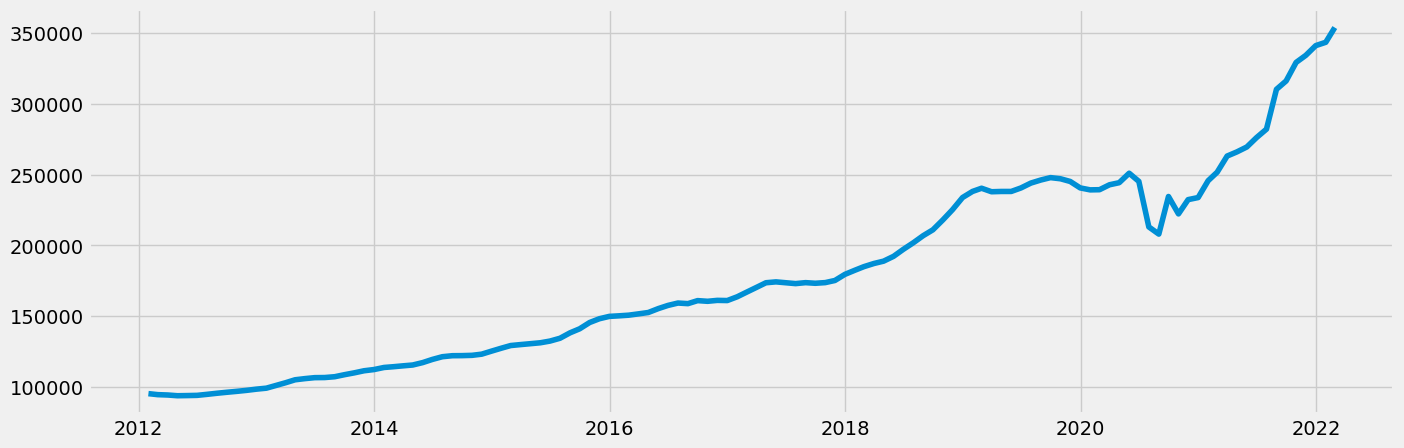

In [113]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.

plt.plot(zillow_sub2)

### Excluding the minor fluctuation in the year 2020-2021, there is an upward trend of home values from 2012 to the present.

In [115]:
# Check for missing values (you shouldn't have any)

zillow_sub2.isnull().sum() 

value    0
dtype: int64

In [116]:
# Check for duplicates

dups = zillow_sub2.duplicated()
dups.sum()

0

# 5. Decompose the data’s components.

In [118]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(zillow_sub2, model='additive')

In [119]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

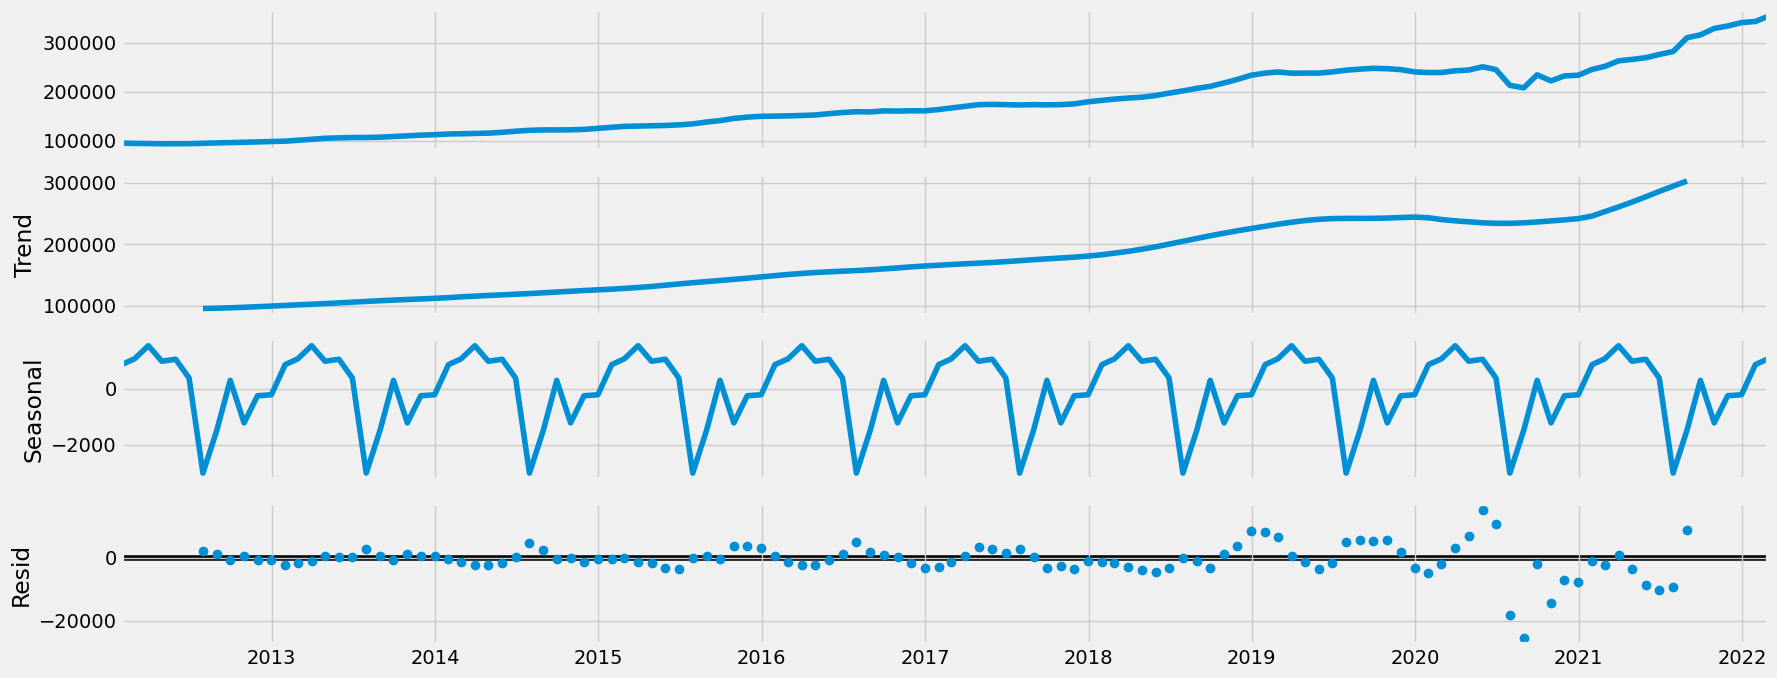

In [120]:
# Plot the separate components

decomposition.plot()
plt.show()

The first chart shows the data itself, called the level, which includes all components. The second chart shows the trend, which appears the same as the level because the data is smooth with little noise. If the data had more noise, the level and trend would differ. The third component is seasonality, represented by regular, spiky fluctuations. Without seasonality, the curve would be flat. Finally, the noise (or residual) is what's left after removing trend and seasonality. There is a slight fluctuation around 2020 and 2021 which could be a noise caused by COVID-19's impact on the housing market.

# 6. Conduct a Dickey-Fuller test to check for stationarity.

In [123]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(zillow_sub2['value'])

Dickey-Fuller Stationarity test:
Test Statistic                   1.281408
p-value                          0.996503
Number of Lags Used             13.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


Test Statistic: The calculated value (1.2814) compared to the critical values. If it's more negative than the critical value, the null hypothesis is rejected. In this case, it's positive and higher than the critical values, so we fail to reject the null hypothesis.

p-value: The probability of observing the test statistic under the null hypothesis. A p-value of 0.9965 is high, indicating no strong evidence against the null hypothesis (non-stationarity).

Number of Lags Used: The number of past time periods (13) considered to account for autocorrelation in the data.

Number of Observations Used: The amount of data points used in the test (108). More observations can improve reliability.

Critical Values (1%, 5%, 10%): Threshold values for the test statistic. If the test statistic is more negative than these values, we reject the null hypothesis. Here, the test statistic is higher than all critical values, so we fail to reject the null hypothesis.

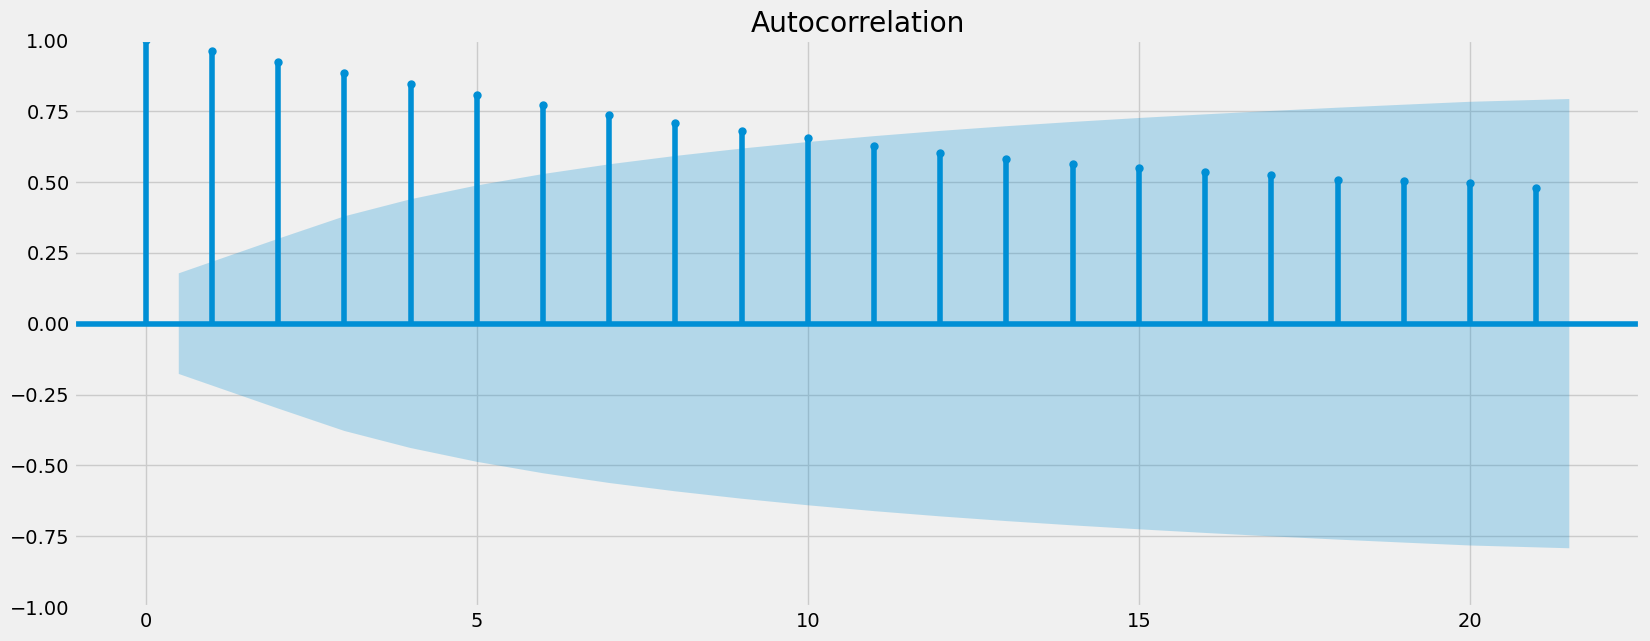

In [125]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(zillow_sub2)
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means you have lags that are significantly correlated with each other. There are many lags beyond this interval, so we can deduce that the data is non-stationary.

# 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [128]:
data_diff = zillow_sub2 - zillow_sub2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [129]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [130]:
data_diff.head()

,value
datetime,
2012-02-29,-719.0
2012-03-31,-253.0
2012-04-30,-509.0
2012-05-31,114.0
2012-06-30,145.0


In [131]:
data_diff.columns

Index(['value'], dtype='object')

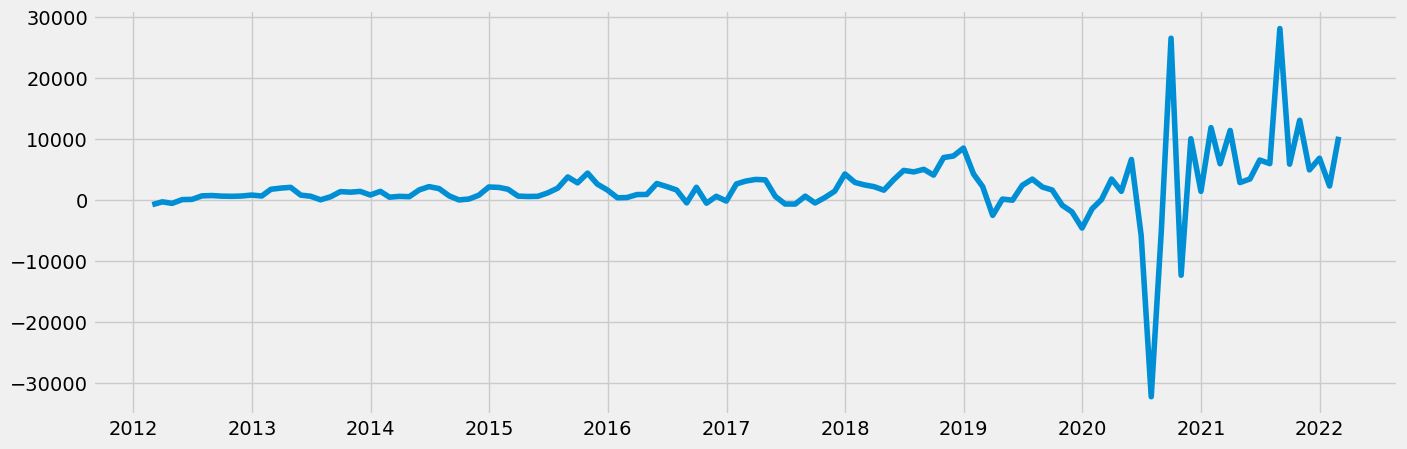

In [132]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [133]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.215269
p-value                          0.019118
Number of Lags Used             13.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


Test Statistic: The calculated value (-3.2153) compared to the critical values. It is more negative than the critical value, so the null hypothesis is rejected.

p-value: The probability of observing the test statistic under the null hypothesis. A p-value of 0.019118 is low, indicating strong evidence against the null hypothesis (non-stationarity).

Number of Lags Used: The number of past time periods (13) considered to account for autocorrelation in the data.

Number of Observations Used: The amount of data points used in the test (107). More observations can improve reliability.

Critical Values (1%, 5%, 10%): Threshold values for the test statistic. If the test statistic is more negative than these values, we reject the null hypothesis. Here, the test statistic is lower than 2 out of 3 critical values, so we can reject the null hypothesis.

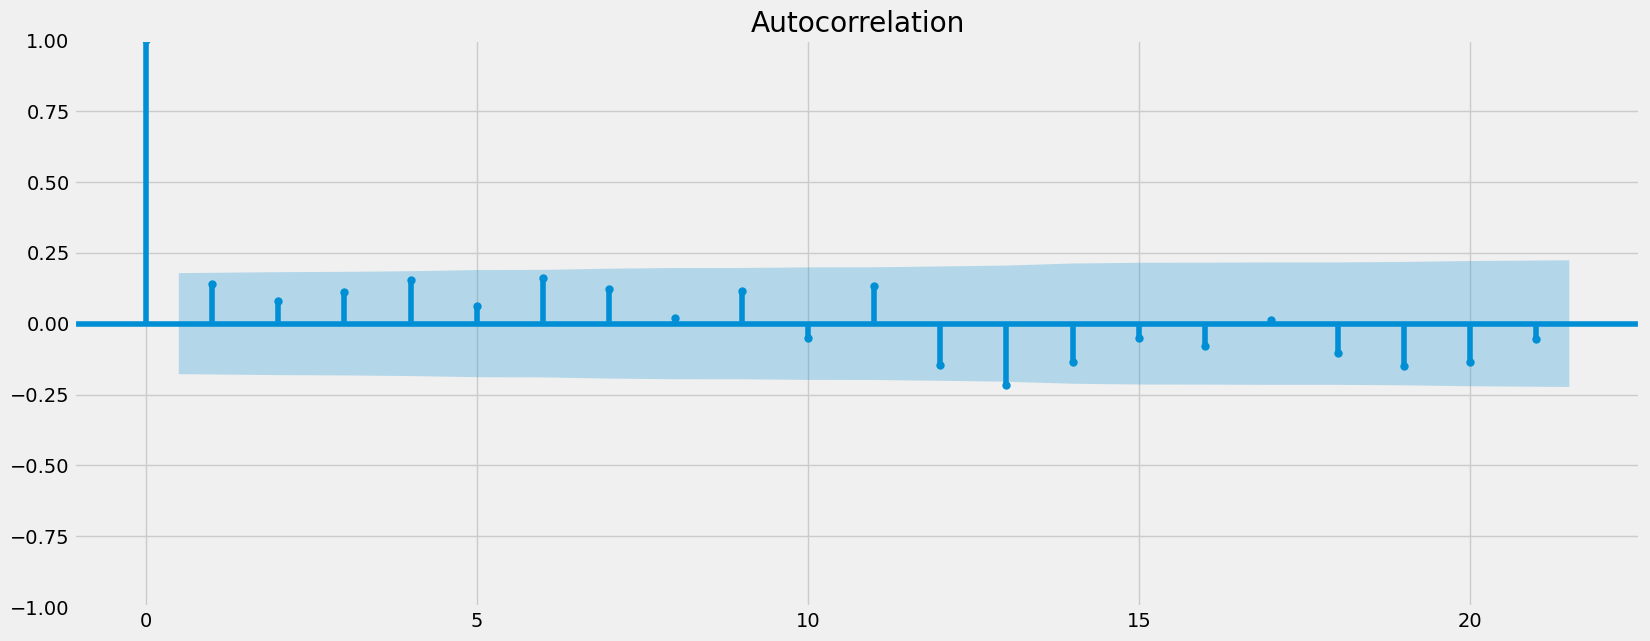

In [135]:
plot_acf(data_diff)
plt.show()

### The test statistic is smaller than the critical value at both the five and ten percent significance levels. I also have a satisfactory p-value (p<0.05). This means I can reject the null hypothesis and, as a result, consider my series stationary.